### Python Software Implementation

In [ ]:
class Mandelbrot:
    def calculate(self, x_scale, y_scale, plot_width, plot_height, max_iteration):
        v_min = max_iteration
        v_max = 0
        iterations = [[0 for _ in range(plot_width)] for _ in range(plot_height)]
        scale_width = x_scale[1] - x_scale[0]
        scale_height = y_scale[1] - y_scale[0]
        for plot_x in range(plot_width):
            for plot_y in range(plot_height):
                """calculate pixels"""
                x_scaled = x_scale[0] + plot_x / plot_width * scale_width
                y_scaled = y_scale[1] - plot_y / plot_height * scale_height
                x = 0.0
                y = 0.0
                iteration = 0
                while x*x + y*y < 4 and iteration < max_iteration:
                    temp = x*x - y*y + x_scaled
                    y = 2*x*y + y_scaled
                    x = temp
                    iteration = iteration + 1
                iterations[plot_y][plot_x] = iteration
                if iteration < v_min:
                    v_min = iteration
                if iteration > v_max:
                    v_max = iteration
        return {
        "values": iterations,
        "vMin": v_min,
        "vMax": v_max
    }

In [ ]:
import matplotlib.pyplot as plt
class MatplotlibView:
    def __init__(self, resolutionX, resolutionY):
        self.resolution = [resolutionX, resolutionY]
        self.dpi = 300
        self.size = [resolutionX/self.dpi, resolutionY/self.dpi]
        plt.figure(figsize=self.size, dpi=self.dpi)

    def render(self, values, v_min, v_max):
        plt.imshow(
            values,
            "gist_stern",
            vmin=v_min,
            vmax=v_max,
            extent=(-2.5, 1.0, -1.0, 1.0)
        )
        plt.show()

In [ ]:
class Controller:
    def __init__(self, model, view):
        self.model = model
        self.view = view
    def update(self, x_scale, y_scale, max_iteration):
        result = self.model.calculate(
            x_scale=x_scale,
            y_scale=y_scale,
            plot_width=self.view.resolution[0],
            plot_height=self.view.resolution[1],
            max_iteration=max_iteration
        )
        self.view.render(
        values=result["values"],
        v_min=result["vMin"],
        v_max=result["vMax"]
        )

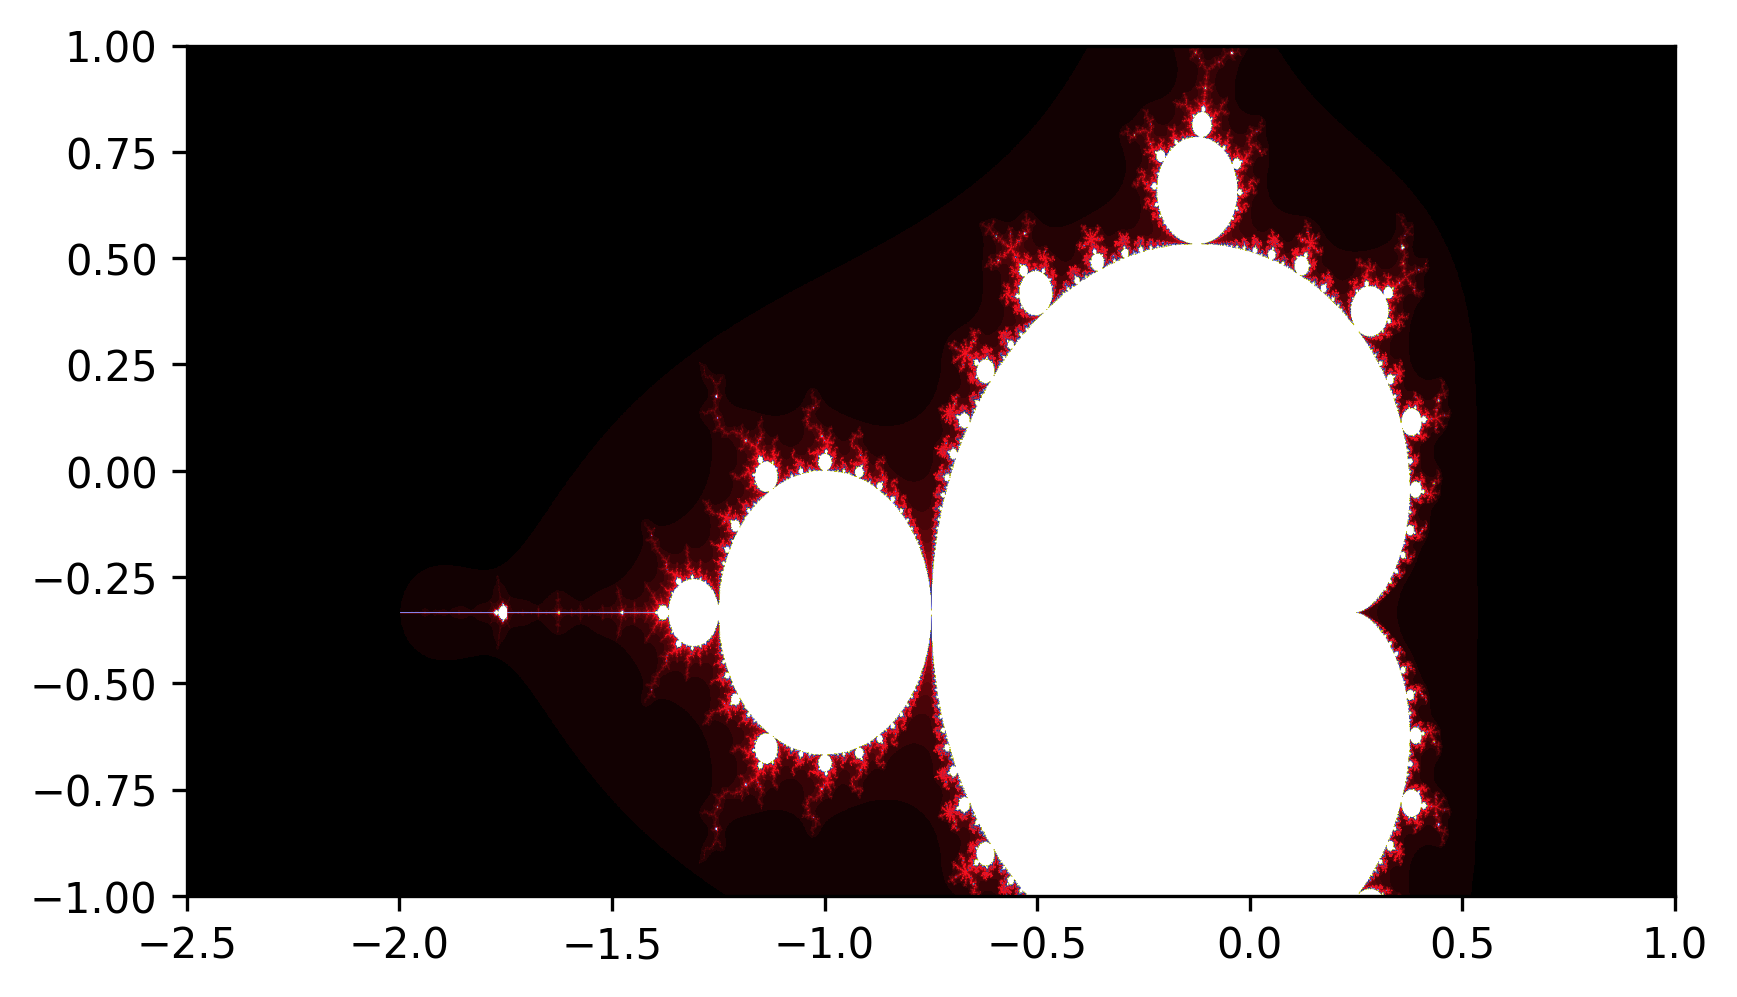

Render took: 318.9778187274933 s


In [ ]:
import time

model = Mandelbrot()
view = MatplotlibView(1920, 1620)
controller = Controller(model, view)
start: float = time.time()
controller.update(x_scale=[-2.5, 1], y_scale=[-0.5, 1], max_iteration=1000)
end = time.time()
print("Render took:", end - start, "s")